<a href="https://colab.research.google.com/github/ProxCentauri/ML-For-Beginners/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing required libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

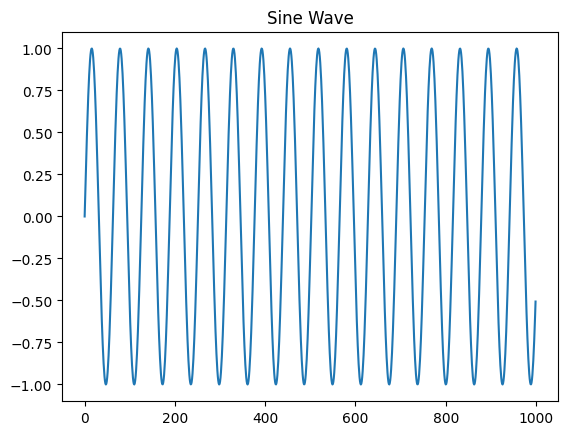

In [3]:
# Generate sample data
data = np.sin(np.linspace(0, 100, 1000))  # Sine wave as our time series data

# Plot the data
plt.plot(data)
plt.title('Sine Wave')
plt.show()

**np.sin(np.linspace(0, 100, 1000)):** Generates a sine wave as a simple time series dataset.

**plt.plot(data):** Plots the generated sine wave.

In [4]:
# Reshape data to 2D array (for scaling)
data = data.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the data for LSTM (Create sequences)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 50
X, y = create_sequences(scaled_data, seq_length)

# Reshape X for LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

**data.reshape(-1, 1):** Reshapes the data to a 2D array for scaling.
MinMaxScaler: Scales the data between 0 and 1 to improve the performance of the LSTM.

**create_sequences:** Function to create sequences of a specified length (seq_length) from the time series data.

**X.reshape:** Reshapes the input data to the format [samples, time steps, features] required by LSTM.

In [5]:
# Build the LSTM model
model = Sequential()

# Add an LSTM layer with 50 units
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))

# Add another LSTM layer
model.add(LSTM(50))

# Add a Dense layer with one output (for regression task)
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Sequential():** Initializes the model as a sequential stack of layers.

**model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1))):** Adds the first LSTM layer with 50 units and specifies the input shape. *return_sequences=True* ensures that the output of this layer will be a sequence, which is required when stacking LSTM layers.

**model.add(LSTM(50)):** Adds a second LSTM layer with 50 units.

**model.add(Dense(1)):** Adds a Dense layer with 1 unit to produce a single output (e.g., predicting the next value in the time series).

**model.compile(optimizer='adam', loss='mean_squared_error'):** Compiles the model with the Adam optimizer and mean squared error as the loss function.

In [7]:
# Train the model
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.1573 - val_loss: 0.0284
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0160 - val_loss: 0.0019
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 8.9971e-04 - val_loss: 1.8815e-04
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 1.6550e-04 - val_loss: 9.2062e-05
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 8.3880e-05 - val_loss: 5.4684e-05
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 5.2760e-05 - val_loss: 4.4168e-05
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 4.3729e-05 - val_loss: 4.2656e-05
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 4.2619e-05 - val_loss: 4.0026e-05
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 4.2182e-05 - val_loss: 4.0690e-05
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 4.0507e-05 - val_loss: 3.6185e-05
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 3.9422e-05 - val_loss: 3.

**model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2):**Trains the model for 20 epochs with a batch size of 32. The data is split into training and validation sets with a ratio of 80:20.

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


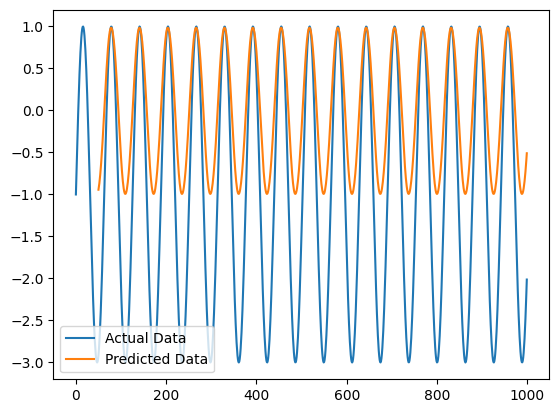

In [8]:
# Make predictions
predictions = model.predict(X)

# Inverse transform the predictions to original scale
predictions = scaler.inverse_transform(predictions)

# Plot the predictions and actual data
plt.plot(scaler.inverse_transform(data), label='Actual Data')
plt.plot(np.arange(seq_length, len(data)), predictions, label='Predicted Data')
plt.legend()
plt.show()

**model.predict(X):** Uses the trained model to make predictions on the input data X.

**scaler.inverse_transform(predictions):** Converts the scaled predictions back to the original scale.

**plt.plot(...):** Plots the actual and predicted data for comparison.